In [19]:
from pathlib import Path
import pandas
path_data = Path("/mnt/storage/Data/NLP/datasets/importance_sampling/")
model_name = "albert-base-v2"
subsample_type = "subsample_rand"
data = {}
for dir_seed in (path_data / "results" / model_name / subsample_type).iterdir():
    seed = int(str(dir_seed).split("_")[-1])
    data[seed] = {}
    for cnt_samples in dir_seed.iterdir():
        with open(cnt_samples/"eval_results_mnli.txt") as f:
            for line in f:
                if line.startswith("eval_acc"):
                    acc = float(line.split("=")[-1].strip())
                    print(acc)
                    data[seed][int(cnt_samples.name)] = acc

0.8387162506367805
0.8187162506367806


In [20]:
df = pandas.DataFrame.from_dict(data, orient='index')
                       #columns=['FP32', 'apex'])
df

,256,128
42,0.838716,0.818716


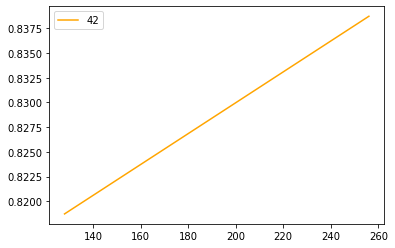

In [21]:
ax = df.T.plot(color=["orange","crimson"])
